<div style="background-color: #e6f7ff; padding: 10px;">
    
#  Classification Module


**Dataset Reference**:

Rice (Cammeo and Osmancik). (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5MW4Z.

The code block below contains the data with the best model selected for prediction. The final model, labeled ***'final_lr'***, will be created and used to predict unseen data. To proceed with the prediction, run the entire code block below.

In [ ]:
import pandas as pd
data = pd.read_csv('./data/rice_main.csv',low_memory=False)

from pycaret.classification import *
cls = ClassificationExperiment()
cls = setup(data, target ='Class', session_id=42, fix_imbalance=True);

lr =  cls.create_model('lr');
tuned_lr = cls.tune_model(lr) ;
final_lr = cls.finalize_model(lr)
final_lr

In [8]:
data

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     14656  494.311005         206.020065          91.730972      0.895405   
1     14634  501.122009         214.106781          87.768288      0.912118   
2     13176  458.342987         193.337387          87.448395      0.891861   
3     14688  507.166992         211.743378          89.312454      0.906691   
4     13479  477.015991         200.053055          86.650291      0.901328   
...     ...         ...                ...                ...           ...   
3043  11538  418.661011         170.850906          86.498398      0.862369   
3044  11441  415.858002         170.486771          85.756592      0.864280   
3045  11625  421.390015         167.714798          89.462570      0.845850   
3046   9882  392.296997         161.193985          78.210480      0.874406   
3047  11434  404.709992         161.079269          90.868195      0.825692   

      Convex_Area    Extent     Class  
0           15072  0.615436    Cammeo  
1           14954  0.693259    Cammeo  
2           13368  0.640669    Cammeo  
3           15262  0.646024    Cammeo  
4           13786  0.657897    Cammeo  
...           ...       ...       ...  
3043        11741  0.713544  Osmancik  
3044        11628  0.681012  Osmancik  
3045        11904  0.694279  Osmancik  
3046        10097  0.659064  Osmancik  
3047        11591  0.802949  Osmancik  

[3048 rows x 8 columns]

<div style="background-color: #e6f7ff; padding: 10px;">
    
## 🔍  Findings
The unseen data is imported below into the ***'unseen'*** variable. Using the final_lr model above

In [9]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
unseen = pd.read_csv('./data/unseen_data.csv')
unseen

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0    12442  459.535004         187.508850          87.187302      0.885323   
1    12408  437.014008         179.741165          88.829605      0.869343   
2    12867  449.079987         181.700561          91.341064      0.864460   
3    13090  472.945007         202.601578          83.230179      0.911722   
4    10359  409.510986         173.337967          76.875809      0.896273   
..     ...         ...                ...                ...           ...   
757  14802  497.832001         209.617950          91.147133      0.900515   
758  17192  528.341980         222.949936          99.092674      0.895798   
759  11234  425.931000         176.301987          82.101532      0.884950   
760  13982  479.785004         204.542389          88.279648      0.902067   
761  14321  490.424988         204.280380          90.682976      0.896069   

     Convex_Area    Extent     Class  
0          12941  0.587580    Cammeo  
1          12598  0.636928  Osmancik  
2          13152  0.649062  Osmancik  
3          13331  0.775290    Cammeo  
4          10510  0.573588  Osmancik  
..           ...       ...       ...  
757        15208  0.622980    Cammeo  
758        17457  0.628914    Cammeo  
759        11452  0.655579  Osmancik  
760        14221  0.772913    Cammeo  
761        14622  0.573873    Cammeo  

[762 rows x 8 columns]

In [12]:
cls = final_lr
unseen_X = unseen.drop('Class', axis=1)
y = unseen['Class']

In [13]:
unseen_X.shape, y.shape

((762, 7), (762,))

In [14]:
y_pred = cls.predict(unseen_X)
y_pred

0      Osmancik
1      Osmancik
2      Osmancik
3        Cammeo
4      Osmancik
         ...   
757      Cammeo
758      Cammeo
759    Osmancik
760      Cammeo
761      Cammeo
Name: Class, Length: 762, dtype: object

In [16]:
accuracy_score(y, y_pred)

0.9304461942257218

In [17]:
 precision_score(y, y_pred, pos_label='Positive', average='weighted')


0.9306964625064568

In [18]:
recall_score(y, y_pred, pos_label='Negative', average='weighted')

0.9304461942257218

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.92      0.93      0.93       350
    Osmancik       0.94      0.93      0.94       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



<div style="background-color: #e6f7ff; padding: 10px;">
    
# 📊  Model Performance Metrics

- **Precision**:
    - Cammeo: 92%
    - Osmancik: 94%
- **Recall** (True Positive Rate):
    - Both classes: 93%
- **F1-score** (Harmonizing precision and recall):
    - Cammeo: 93%
    - Osmancik: 94%
- **Overall Accuracy**:
    - 93%

These results demonstrate the model's effectiveness in discriminating between rice types.


In [19]:
cm = confusion_matrix(y, y_pred)
cm

array([[327,  23],
       [ 30, 382]], dtype=int64)

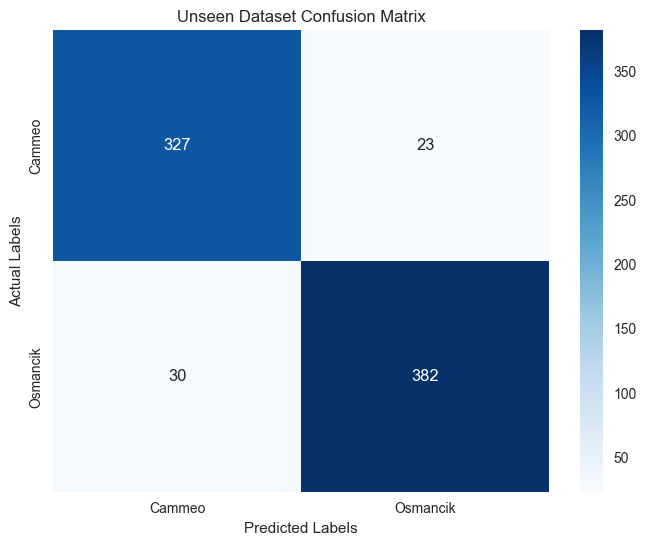

In [20]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_xticklabels(['Cammeo', 'Osmancik'])
ax.set_yticklabels(['Cammeo', 'Osmancik'])
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Unseen Dataset Confusion Matrix')
plt.show()

<div style="background-color: #e6f7ff; padding: 10px;">
    
# 🧮 Confusion Matrix Analysis

The confusion matrix shows how well the model classified instances into categories. Here's the breakdown:

- **True Positives (TP)**: 382 instances correctly classified as 'Osmancik'.
- **True Negatives (TN)**: 327 instances correctly classified as 'Cammeo'.
- **False Positives (FP)**: 23 instances wrongly classified as 'Osmancik'.
- **False Negatives (FN)**: 30 instances mistakenly classified as 'Cammeo'.

This matrix provides a detailed analysis of the model's classification performance, highlighting its strengths and weaknesses.


<div style="background-color: #e6f7ff; padding: 10px;">
    
# 📝  Model Performance Summary

- The model demonstrates remarkable accuracy in classifying different rice types, particularly distinguishing between 'Cammeo' and 'Osmancik' varieties.
- Key Metrics:
    - **Precision**: High precision of 92% for 'Cammeo' and 94% for 'Osmancik'.
    - **Recall**: 93% for both classes, indicating the model's ability to identify actual positives.
    - **F1-score**: Balanced performance with 93% for 'Cammeo' and 94% for 'Osmancik'.
    - **Overall Accuracy**: Impressive 93% accuracy across all classes.
- Misclassifications: While there were a few errors (as shown in the confusion matrix), the model's performance suggests practical applicability, especially in agricultural management.

In summary, the model holds promise for discriminating between rice types, which is crucial for various real-world scenarios. 🌾🔍
